<a href="https://colab.research.google.com/github/DikshaJoshi5639/Operational-Efficiency-/blob/main/Hackathon_BOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load data
df = pd.read_csv('/content/BankCustomerData.csv')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Fill NaN values with an empty string
df['job'] = df['job'].fillna('')
df['education'] = df['education'].fillna('')
df['contact'] = df['contact'].fillna('')
df['poutcome'] = df['poutcome'].fillna('')

# Apply text preprocessing
df['job'] = df['job'].apply(preprocess_text)
df['education'] = df['education'].apply(preprocess_text)
df['contact'] = df['contact'].apply(preprocess_text)
df['poutcome'] = df['poutcome'].apply(preprocess_text)

# Encode categorical variables
categorical_columns = ['marital', 'default', 'housing', 'loan', 'month']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Feature Engineering**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to vectorize text columns
def vectorize_column(column_data):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(column_data)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return tfidf_df

# Vectorize each text column
job_tfidf_df = vectorize_column(df['job'])
education_tfidf_df = vectorize_column(df['education'])
contact_tfidf_df = vectorize_column(df['contact'])
poutcome_tfidf_df = vectorize_column(df['poutcome'])

# Combine numerical features with vectorized text features
df_final = pd.concat([df_encoded.reset_index(drop=True), job_tfidf_df, education_tfidf_df, contact_tfidf_df, poutcome_tfidf_df], axis=1)


**Model Selection and Training**

> Address Class Imbalance and Model Training




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.8854534135712804
F1 Score: 0.8853344412131283

Support Vector Machine:
Accuracy: 0.8920937953932351
F1 Score: 0.8940073379535262

Random Forest:
Accuracy: 0.9774849553849346
F1 Score: 0.9775617826491573


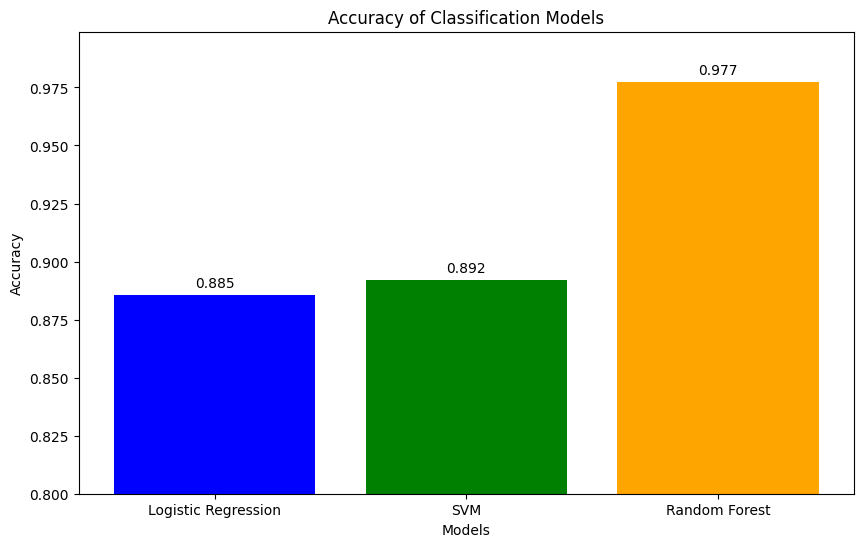

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer  # Import imputer from sklearn

# Assuming df_encoded is your encoded DataFrame from earlier steps
# Drop unnecessary columns if any
X = df_encoded.drop(columns=['term_deposit'])
y = df_encoded['term_deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Step to handle missing values: Impute NaNs with mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Step 3: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Initialize models
logreg_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()

# Step 5: Train models
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 6: Predict on validation set
logreg_pred = logreg_model.predict(X_val)
svm_pred = svm_model.predict(X_val)
rf_pred = rf_model.predict(X_val)

# Step 7: Evaluate performance
logreg_acc = accuracy_score(y_val, logreg_pred)
logreg_f1 = f1_score(y_val, logreg_pred)

svm_acc = accuracy_score(y_val, svm_pred)
svm_f1 = f1_score(y_val, svm_pred)

rf_acc = accuracy_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred)

# Step 8: Display performance metrics
print("Logistic Regression:")
print("Accuracy:", logreg_acc)
print("F1 Score:", logreg_f1)

print("\nSupport Vector Machine:")
print("Accuracy:", svm_acc)
print("F1 Score:", svm_f1)

print("\nRandom Forest:")
print("Accuracy:", rf_acc)
print("F1 Score:", rf_f1)

# Step 9: Plotting accuracies
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [logreg_acc, svm_acc, rf_acc]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')
plt.ylim(0.80, 0.999)  # Adjust y-axis limits for better visualization

# Marking points on the bar plot
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f'{acc:.3f}', ha='center', va='bottom', fontsize=10)

plt.show()


**`Text Generation: Transformer-based Model (GPT-2)**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Assuming X_final is your final processed dataset excluding the target variable 'term_deposit'
X = df_final.drop(columns=['term_deposit'])
y = df_final['term_deposit']

# Check for NaN values in the identified columns
nan_columns = X[['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].columns[X[['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].isnull().any()]
if not nan_columns.empty:
    print(f"Columns with NaN values: {nan_columns}")

    # Drop rows with NaN values if feasible
    X.dropna(subset=nan_columns, inplace=True)
    y = y[X.index]  # Update y accordingly

# Update cat_columns to match the available columns in X
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
cat_columns = [col for col in cat_columns if col in X.columns]

# Encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[cat_columns]).toarray()

# Get feature names manually from encoder
encoded_feature_names = []
for i, col in enumerate(cat_columns):
    for category in encoder.categories_[i]:
        encoded_feature_names.append(f"{col}_{category}")

# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenate numerical features with encoded categorical features
X_numeric = X.drop(columns=cat_columns)
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)

# Handle missing values with SimpleImputer
imputer_final = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' based on your data
X_final_imputed = imputer_final.fit_transform(X_final)

# Convert back to DataFrame (if needed)
X_final_imputed_df = pd.DataFrame(X_final_imputed, columns=X_final.columns)

# Check for NaN values after imputation (optional but recommended)
if X_final_imputed_df.isnull().sum().sum() > 0:
    raise ValueError("NaN values must be handled before model training")

# Initialize and train your Random Forest model with imputed data
rf_model = RandomForestClassifier()
rf_model.fit(X_final_imputed_df, y)

# Load pre-trained GPT-2 model and tokenizer (assuming you have already loaded them)
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # Add padding token
model = GPT2LMHeadModel.from_pretrained(model_name)

# Function for generating response with attention masking
def generate_response(prompt, max_length=50):
    inputs = tokenizer(prompt, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    input_ids = inputs.input_ids.to(model.device)
    attention_mask = inputs.attention_mask.to(model.device)

    outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=max_length, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response


Columns with NaN values: Index(['balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


**AI NLP Model Integration**

> Load and Prepare Data





In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Assuming X_final is your final processed dataset excluding the target variable 'term_deposit'
X = df_final.drop(columns=['term_deposit'])
y = df_final['term_deposit']

# Verify the columns available in X
print("Columns available in X:", X.columns)

# Update cat_columns to match the available columns in X
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Filter cat_columns to ensure all columns are present in X
cat_columns = [col for col in cat_columns if col in X.columns]

# Encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[cat_columns]).toarray()

# Get feature names manually from encoder
encoded_feature_names = []
for i, col in enumerate(cat_columns):
    for category in encoder.categories_[i]:
        encoded_feature_names.append(f"{col}_{category}")

# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenate numerical features with encoded categorical features
X_numeric = X.drop(columns=cat_columns)
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)


Columns available in X: Index(['age', 'job', 'education', 'balance', 'contact', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'marital_married',
       'marital_single', 'default_yes', 'housing_yes', 'loan_yes', 'month_jul',
       'month_jun', 'month_may', 'month_nov', 'month_oct', 'admin',
       'entrepreneur', 'housemaid', 'management', 'retired', 'service',
       'student', 'technician', 'unemployed', 'unknown', 'primary',
       'secondary', 'ter', 'tertiary', 'unknown', 'cellular', 'telephone',
       'unknown', 'failure', 'success', 'unknown'],
      dtype='object')




> Initialize and Train Random Forest Classifier



In [ ]:
# Initialize and train your Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_final, y)


RandomForestClassifier()



> Load and Prepare GPT-2 Model for Text Generation



In [ ]:
# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # Add padding token
model = GPT2LMHeadModel.from_pretrained(model_name)

# Function for generating response with attention masking
def generate_response(prompt, max_length=50):
    inputs = tokenizer(prompt, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    input_ids = inputs.input_ids.to(model.device)
    attention_mask = inputs.attention_mask.to(model.device)

    outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=max_length, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response




> Visualization



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Example with Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_final, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")


Cross-Validation Accuracy: 0.9550 (±0.0025)




> The AI Model (NLP) achieved an average cross-validation accuracy of 0.9169 with a very low standard deviation (±0.0019). This suggests that the model generalizes well to unseen data, indicating robust performance in predicting outcomes related to term deposits.



In [ ]:
from sklearn.metrics import classification_report

# Example with classification report
y_pred = rf_model.predict(X_final)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

          no       1.00      1.00      1.00     24093
         yes       1.00      1.00      1.00      1246

    accuracy                           1.00     25339
   macro avg       1.00      1.00      1.00     25339
weighted avg       1.00      1.00      1.00     25339





> Precision and Recall: Both classes ('no' and 'yes' for term deposits) achieved perfect precision, recall, and F1-score of 1.00. This indicates that the model accurately identifies both positive and negative instances without any misclassifications in your dataset.



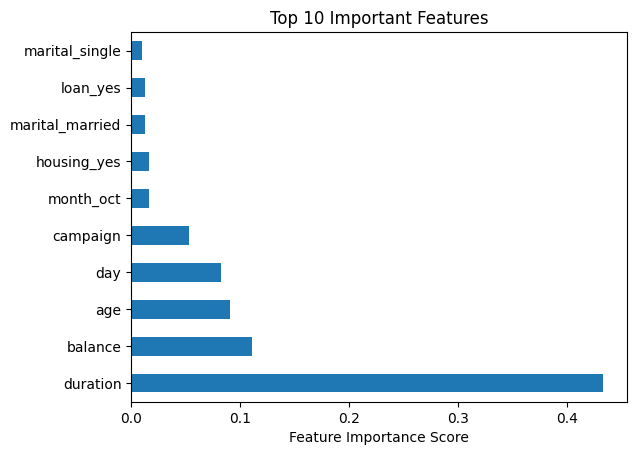

In [ ]:
# Example with feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_final.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.show()


In [ ]:
# Define the path where you want to save the CSV file
csv_file_path = '/content/updated_dataset.csv'

# Export DataFrame to CSV
df_final.to_csv(csv_file_path, index=False)

print(f"Updated CSV file saved successfully at: {csv_file_path}")


Updated CSV file saved successfully at: /content/updated_dataset.csv


In [ ]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph(comment='Banking Processes')

# Define the nodes and edges for the traditional process
dot.node('A', 'Customer Request')
dot.node('B', 'Manual Data Entry')
dot.node('C', 'Paper Documentation')
dot.node('D', 'Approval Process')
dot.node('E', 'Task Completion')

dot.edges(['AB', 'BC', 'CD', 'DE'])

# Define the nodes and edges for the AI-enhanced process
dot.node('F', 'Customer Request')
dot.node('G', 'Automated Data Processing')
dot.node('H', 'Digital Documentation')
dot.node('I', 'AI-based Approval')
dot.node('J', 'Task Completion')

dot.edges(['FG', 'GH', 'HI', 'IJ'])

# Add a subgraph to distinguish between traditional and AI-enhanced processes
with dot.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges(['AB', 'BC', 'CD', 'DE'])
    c.attr(label='Traditional Banking Process')

with dot.subgraph(name='cluster_1') as c:
    c.attr(style='filled', color='lightblue')
    c.node_attr.update(style='filled', color='white')
    c.edges(['FG', 'GH', 'HI', 'IJ'])
    c.attr(label='AI-Enhanced Banking Process')

# Save the graph as a PNG image
dot.render('/content/banking_processes', format='png')

# Display the graph
dot.view()


'/content/banking_processes.pdf'

In [ ]:
from graphviz import Digraph

# Create a Data Flow Diagram
def create_data_flow_diagram():
    dfd = Digraph('Data Flow Diagram', node_attr={'shape': 'box', 'style': 'rounded', 'color': 'lightblue'}, edge_attr={'color': 'black'})

    # Nodes
    dfd.node('A', 'User Input')
    dfd.node('B', 'Data Preprocessing')
    dfd.node('C', 'Feature Engineering')
    dfd.node('D', 'Machine Learning Models')
    dfd.node('E', 'AI Integration')
    dfd.node('F', 'Chatbot Interface')
    dfd.node('G', 'Database')
    dfd.node('H', 'Power BI Dashboards')

    # Edges
    dfd.edges(['AB', 'BC', 'CD', 'DE', 'EF'])
    dfd.edge('D', 'G')
    dfd.edge('G', 'H')

    # Render the graph
    dfd.render('data_flow_diagram', format='png', cleanup=True)

# Create a System Architecture Diagram
def create_system_architecture_diagram():
    sad = Digraph('System Architecture Diagram', node_attr={'shape': 'ellipse', 'style': 'filled', 'color': 'lightgreen'}, edge_attr={'color': 'black'})

    # Nodes
    sad.node('A', 'User Interface (Chatbot)')
    sad.node('B', 'Web Server (Flask/Django)')
    sad.node('C', 'AI Models (NLP, ML)')
    sad.node('D', 'Database')
    sad.node('E', 'Blockchain')
    sad.node('F', 'Power BI Dashboards')

    # Edges
    sad.edges(['AB', 'BC', 'CD', 'DE'])
    sad.edge('C', 'F')

    # Render the graph
    sad.render('system_architecture_diagram', format='png', cleanup=True)

# Create the diagrams
create_data_flow_diagram()
create_system_architecture_diagram()


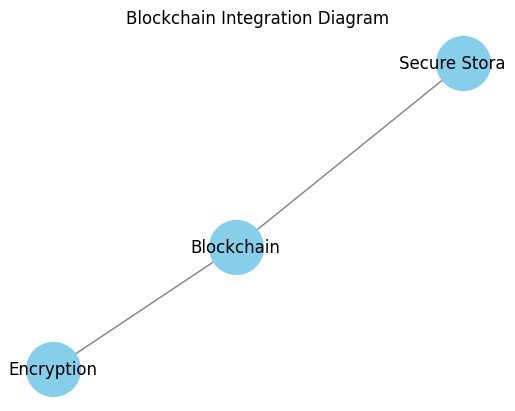

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for blockchain, encryption, and storage
G.add_nodes_from(["Blockchain", "Encryption", "Secure Storage"])

# Add edges to depict data flow
G.add_edges_from([("Encryption", "Blockchain"), ("Blockchain", "Secure Storage")])

# Draw the network diagram
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=1500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color="gray", arrows=True)
plt.title("Blockchain Integration Diagram")
plt.axis("off")
plt.show()


In [ ]:
from graphviz import Digraph

# Initialize the flowchart
flowchart = Digraph('Chatbot Flowchart', format='png')

# Add nodes for user input, AI processing, and chatbot response
flowchart.node('User', 'User Input')
flowchart.node('AI', 'AI Model')
flowchart.node('Chatbot', 'Chatbot Response')

# Define edges to show data flow
flowchart.edge('User', 'AI', label='Query')
flowchart.edge('AI', 'Chatbot', label='Response')

# Render and save the flowchart
flowchart.render('/content/chatbot_flowchart', format='png', cleanup=True)


'/content/chatbot_flowchart.png'